In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
df.shape

(1000, 8)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
df['TotalScore'] = df[['math score', 'reading score','writing score']].sum(axis=1)

In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,TotalScore
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [15]:
gender = pd.get_dummies(df['gender'],drop_first=True)

In [16]:
df = pd.concat([df,gender],axis=1)

In [17]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,TotalScore,male
0,female,group B,bachelor's degree,standard,none,72,72,74,218,0
1,female,group C,some college,standard,completed,69,90,88,247,0
2,female,group B,master's degree,standard,none,90,95,93,278,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,1
4,male,group C,some college,standard,none,76,78,75,229,1


In [18]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [19]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [20]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [21]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [22]:
group = pd.get_dummies(df['race/ethnicity'],drop_first=True)
education = pd.get_dummies(df['parental level of education'],drop_first=True)
lunch = pd.get_dummies(df['lunch'],drop_first=True)
course = pd.get_dummies(df['test preparation course'],drop_first=True)

In [23]:
df = pd.concat([df,group,education,lunch,course],axis=1)

In [24]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,TotalScore,male,...,group C,group D,group E,bachelor's degree,high school,master's degree,some college,some high school,standard,none
0,female,group B,bachelor's degree,standard,none,72,72,74,218,0,...,0,0,0,1,0,0,0,0,1,1
1,female,group C,some college,standard,completed,69,90,88,247,0,...,1,0,0,0,0,0,1,0,1,0
2,female,group B,master's degree,standard,none,90,95,93,278,0,...,0,0,0,0,0,1,0,0,1,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,1,...,0,0,0,0,0,0,0,0,0,1
4,male,group C,some college,standard,none,76,78,75,229,1,...,1,0,0,0,0,0,1,0,1,1


In [25]:
df.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course'],axis=1,inplace=True)

In [26]:
df.head()

,math score,reading score,writing score,TotalScore,male,group B,group C,group D,group E,bachelor's degree,high school,master's degree,some college,some high school,standard,none
0,72,72,74,218,0,1,0,0,0,1,0,0,0,0,1,1
1,69,90,88,247,0,0,1,0,0,0,0,0,1,0,1,0
2,90,95,93,278,0,1,0,0,0,0,0,1,0,0,1,1
3,47,57,44,148,1,0,0,0,0,0,0,0,0,0,0,1
4,76,78,75,229,1,0,1,0,0,0,0,0,1,0,1,1


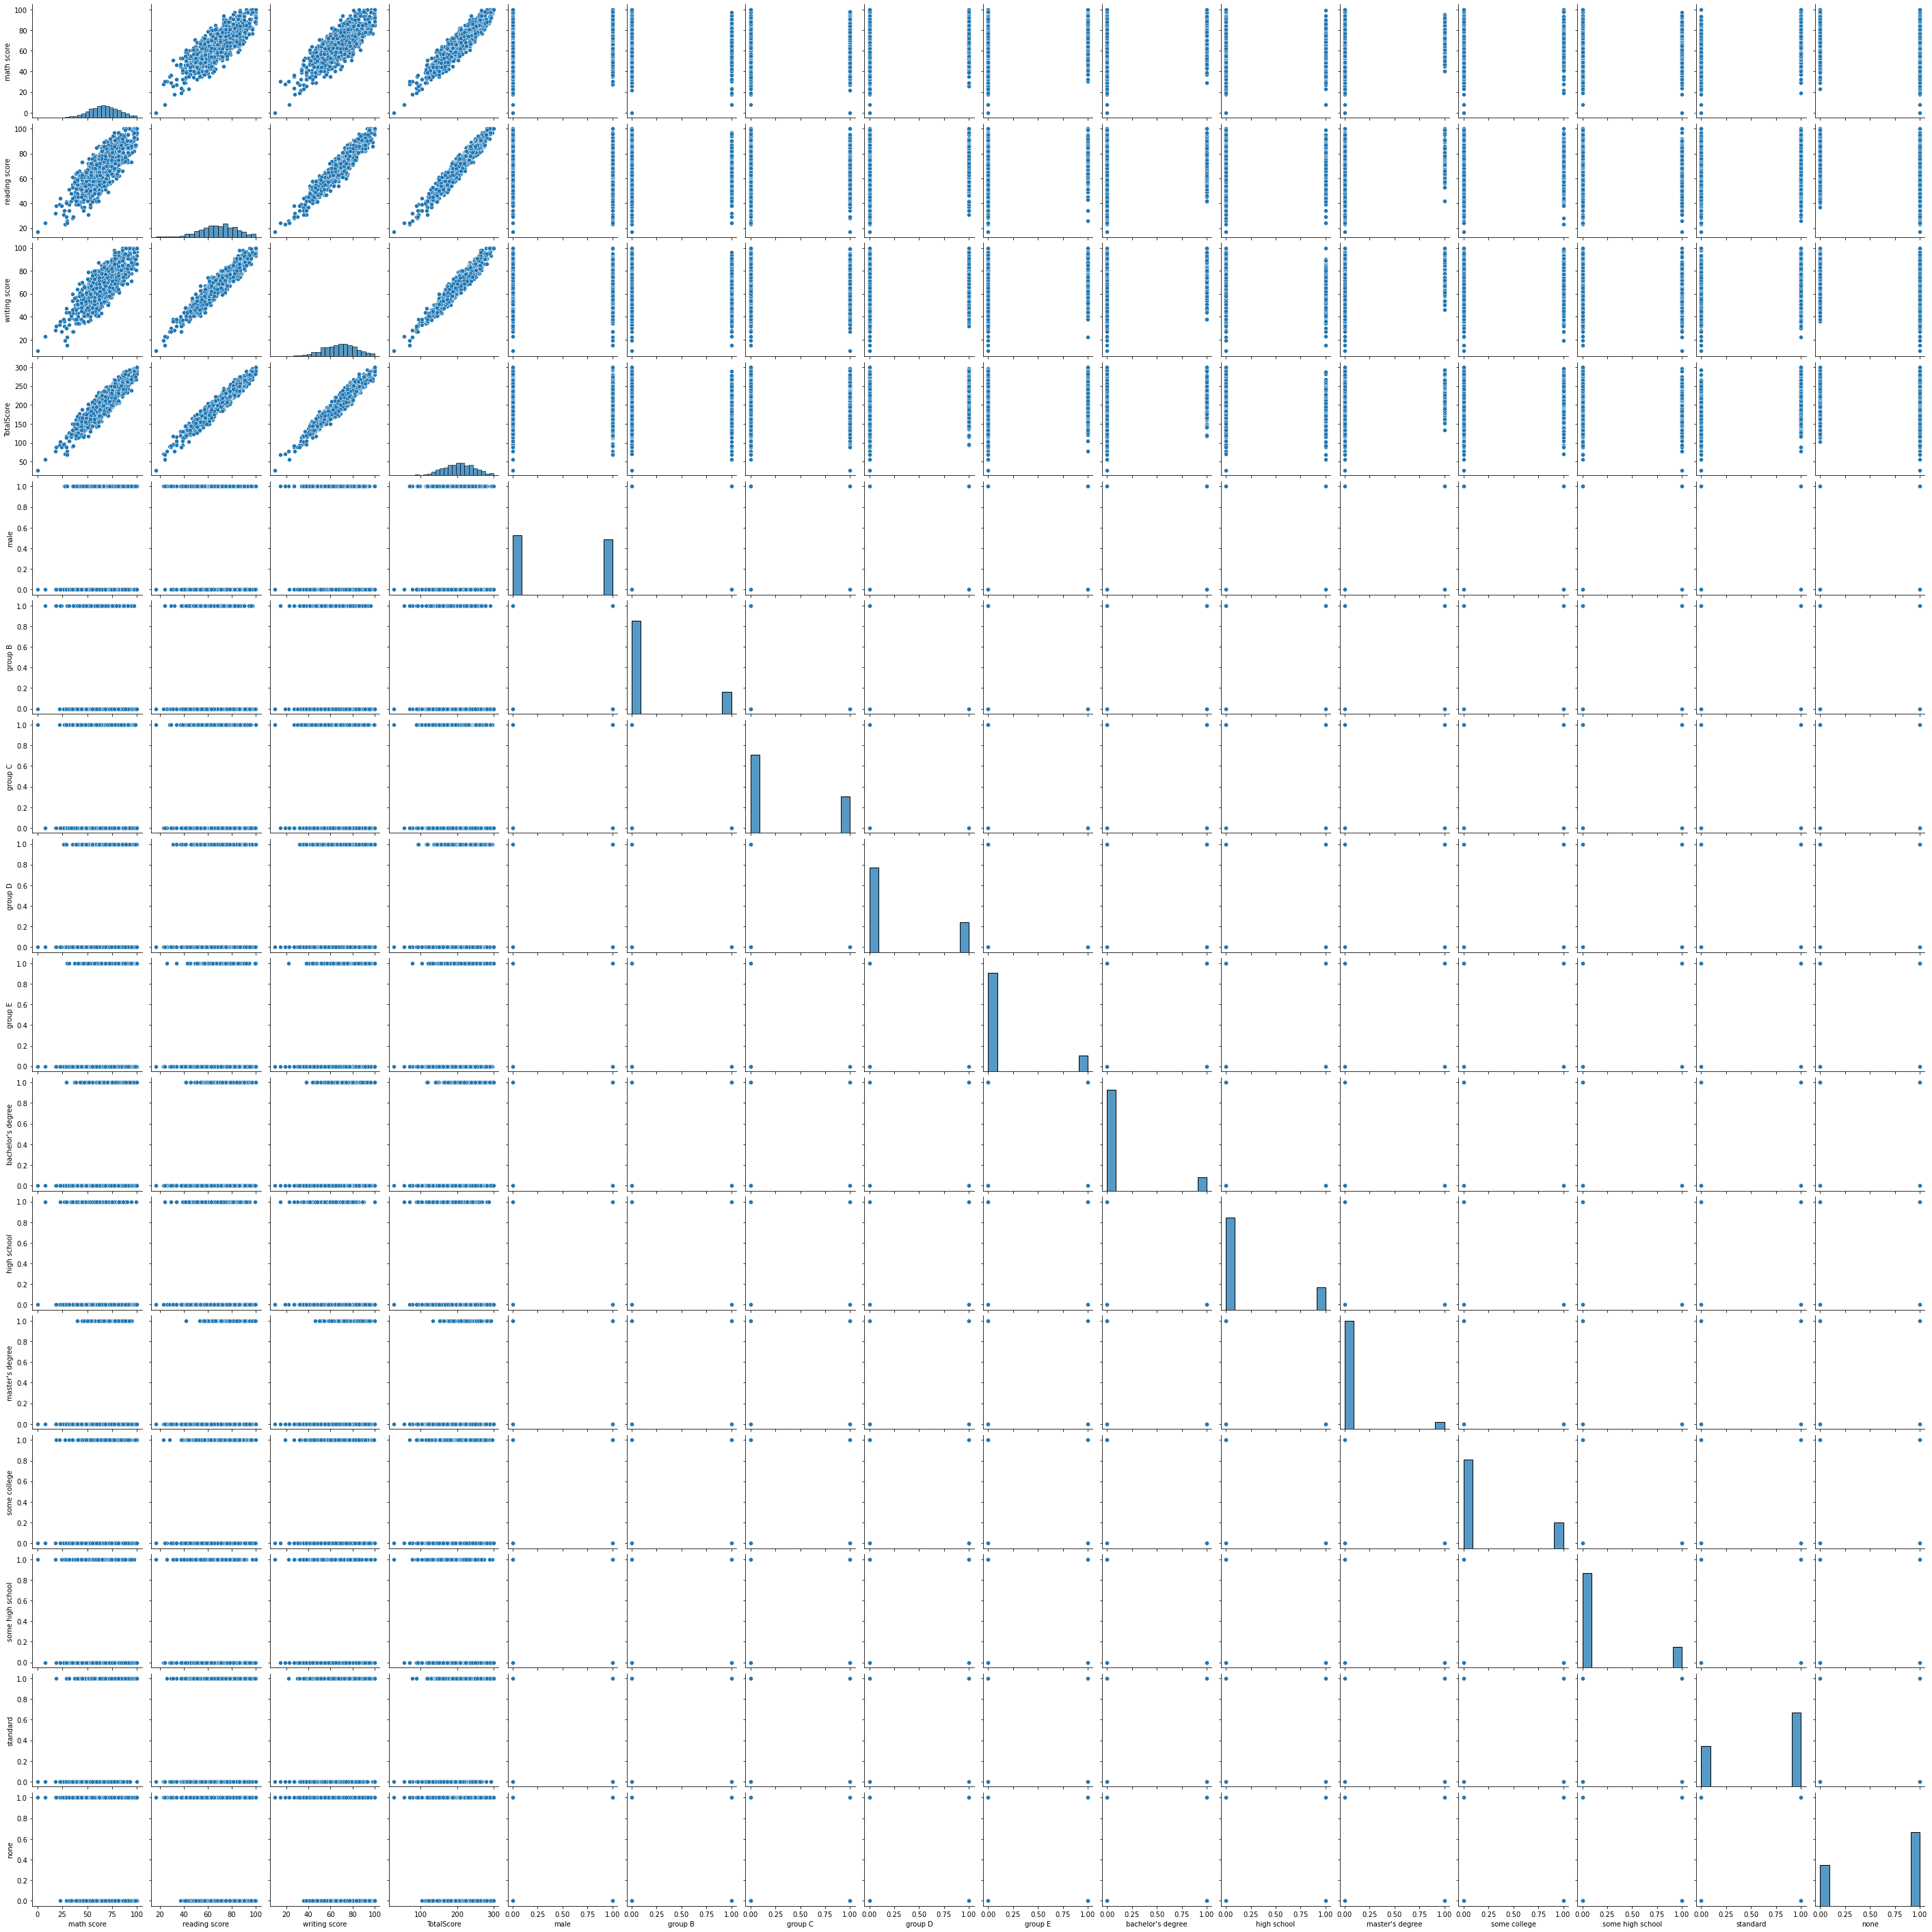

In [28]:
sns.pairplot(data=df)

<AxesSubplot:>

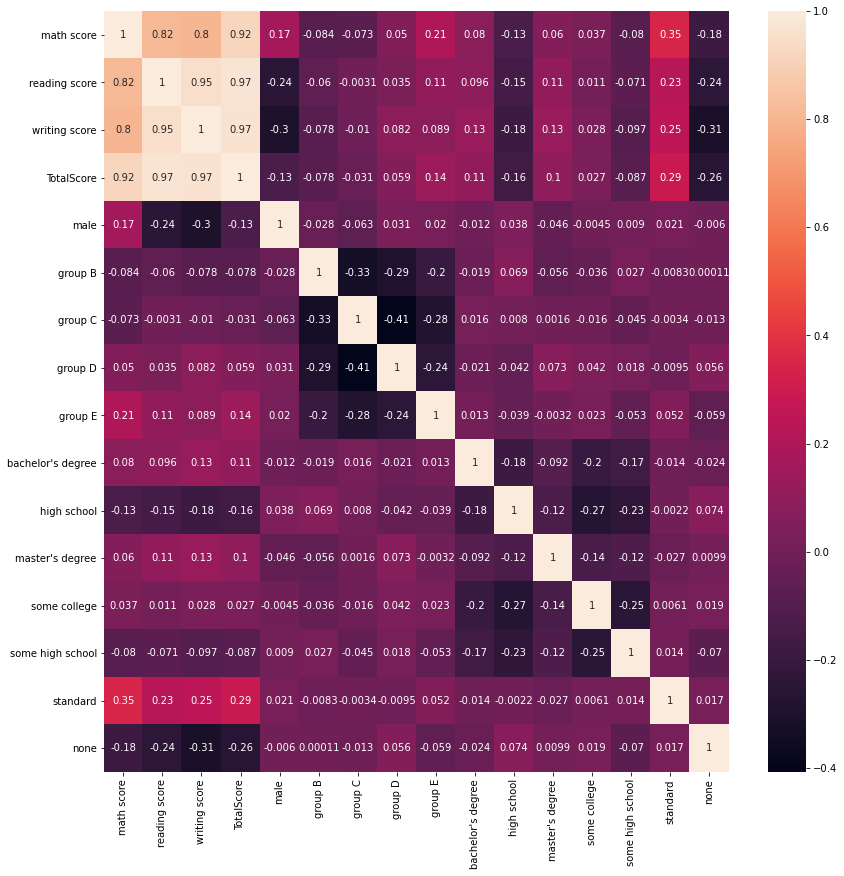

In [29]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),annot=True)

In [31]:
pip install scikit-learn

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [34]:
df.head()

,math score,reading score,writing score,TotalScore,male,group B,group C,group D,group E,bachelor's degree,high school,master's degree,some college,some high school,standard,none
0,0.390024,0.193999,0.391492,0.343574,-0.964625,2.064742,-0.684419,-0.59583,-0.403473,2.733967,-0.493742,-0.250398,-0.540361,-0.466933,0.741881,0.746748
1,0.192076,1.427476,1.313269,1.021927,-0.964625,-0.484322,1.461094,-0.59583,-0.403473,-0.365769,-0.493742,-0.250398,1.850616,-0.466933,0.741881,-1.339140
2,1.577711,1.770109,1.642475,1.747064,-0.964625,2.064742,-0.684419,-0.59583,-0.403473,-0.365769,-0.493742,3.993639,-0.540361,-0.466933,0.741881,0.746748
3,-1.259543,-0.833899,-1.583744,-1.293830,1.036672,-0.484322,-0.684419,-0.59583,-0.403473,-0.365769,-0.493742,-0.250398,-0.540361,-0.466933,-1.347925,0.746748
4,0.653954,0.605158,0.457333,0.600881,1.036672,-0.484322,1.461094,-0.59583,-0.403473,-0.365769,-0.493742,-0.250398,1.850616,-0.466933,0.741881,0.746748


In [35]:
X = df.drop('TotalScore',axis=1)
y = df['TotalScore']

In [36]:
from sklearn.model_selection import train_test_split,cross_val_score

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [38]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [39]:
LR.fit(X_train,y_train)

LinearRegression()

In [40]:
print(LR.score(X_test,y_test))

1.0


In [41]:
y_predLR = LR.predict(X_test)

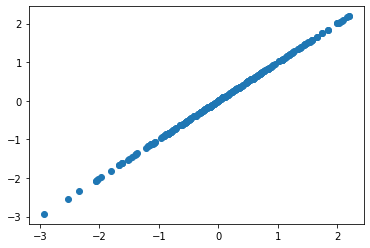

In [42]:
plt.scatter(y_test,y_predLR)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalScore', ylabel='Density'>

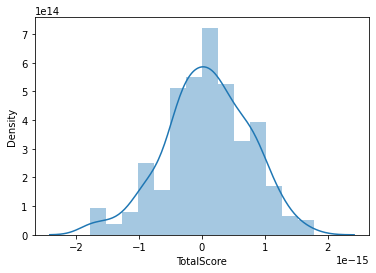

In [43]:
sns.distplot(y_test-y_predLR)

In [44]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predLR))
print('MSE:', metrics.mean_squared_error(y_test, y_predLR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predLR)))

MAE: 5.319182594387684e-16
MSE: 4.5083536852491995e-31
RMSE: 6.714427514873624e-16


In [45]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()

In [46]:
RFR.fit(X_train,y_train)

RandomForestRegressor()

In [47]:
print(RFR.score(X_test,y_test))

0.9954318714378021


In [48]:
y_predRFR = RFR.predict(X_test)

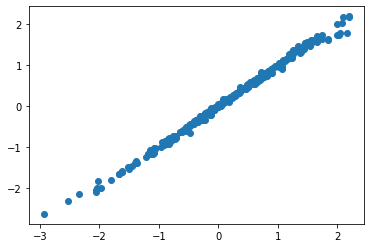

In [49]:
plt.scatter(y_test,y_predRFR)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalScore', ylabel='Density'>

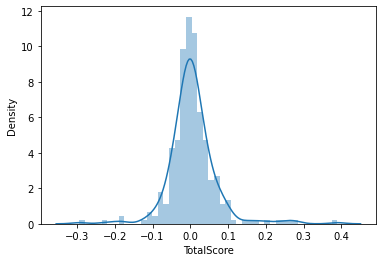

In [50]:
sns.distplot(y_test-y_predRFR)

In [51]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predRFR))
print('MSE:', metrics.mean_squared_error(y_test, y_predRFR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predRFR)))

MAE: 0.03979516543138112
MSE: 0.004106281114160412
RMSE: 0.0640802708652235


In [53]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
from sklearn.svm import SVR
svr = SVR()

In [54]:
DTR.fit(X_train,y_train)

DecisionTreeRegressor()

In [55]:
svr.fit(X_train,y_train)

SVR()

In [56]:
print("Decision Tree",DTR.score(X_test,y_test))
print("Support Vector Regressor",svr.score(X_test,y_test))

Decision Tree 0.9862717170371603
Support Vector Regressor 0.9853679664535371


In [57]:
y_predDTR = DTR.predict(X_test)
y_predSVR = svr.predict(X_test)

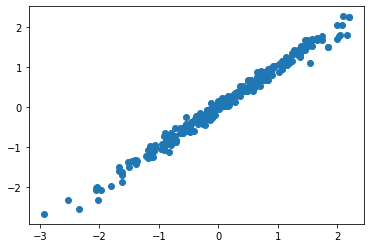

In [58]:
plt.scatter(y_test,y_predDTR)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalScore', ylabel='Density'>

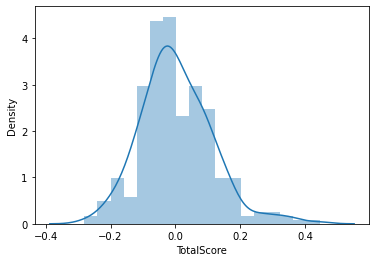

In [59]:
sns.distplot(y_test-y_predDTR)

In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predDTR))
print('MSE:', metrics.mean_squared_error(y_test, y_predDTR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predDTR)))

MAE: 0.08498908719033936
MSE: 0.012340324553614458
RMSE: 0.11108701343367935


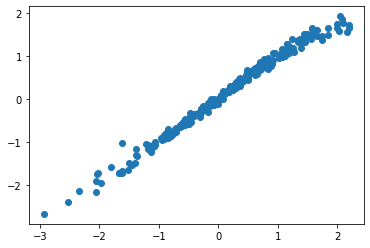

In [61]:
plt.scatter(y_test,y_predSVR)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalScore', ylabel='Density'>

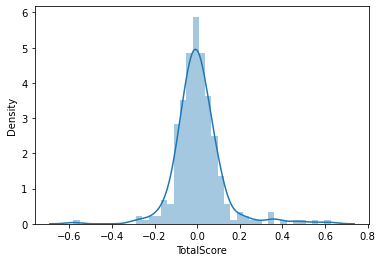

In [62]:
sns.distplot(y_test-y_predSVR)

In [63]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predSVR))
print('MSE:', metrics.mean_squared_error(y_test, y_predSVR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predSVR)))

MAE: 0.07270025357947678
MSE: 0.013152704044015237
RMSE: 0.1146852389979427
